In [2]:
!pip install sounddevice
!pip install librosa
!pip install soundfile

  Using cached sounddevice-0.4.6-py3-none-win_amd64.whl (199 kB)
  Obtaining dependency information for librosa from https://files.pythonhosted.org/packages/e2/a2/4f639c1168d7aada749a896afb4892a831e2041bebdcf636aebfe9e86556/librosa-0.10.1-py3-none-any.whl.metadata
  Obtaining dependency information for audioread>=2.1.9 from https://files.pythonhosted.org/packages/57/8d/30aa32745af16af0a9a650115fbe81bde7c610ed5c21b381fca0196f3a7f/audioread-3.0.1-py3-none-any.whl.metadata
  Using cached soundfile-0.12.1-py2.py3-none-win_amd64.whl (1.0 MB)
  Obtaining dependency information for soxr>=0.3.2 from https://files.pythonhosted.org/packages/0d/95/8398287a3a00d006ebbe5fcada88bb2536acde2beecce892ff091e1c1a3b/soxr-0.3.7-cp311-cp311-win_amd64.whl.metadata
Using cached librosa-0.10.1-py3-none-any.whl (253 kB)
Using cached audioread-3.0.1-py3-none-any.whl (23 kB)
Using cached soxr-0.3.7-cp311-cp311-win_amd64.whl (184 kB)


In [3]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft
from scipy import signal
import scipy.io.wavfile as wav
import sounddevice as sd
import soundfile as sf
import librosa
import librosa.display
from IPython.display import Audio

In [4]:
def create_sin_waves():
    fs = 8000
    t = np.linspace(0, 3, 3*fs, endpoint=False)
    frequencies = [100, 500, 1500, 2500]
    amplitudes = [1, 0.8, 0.6, 0.4]
    phases = [0, np.pi/4, np.pi/2, 3*np.pi/4]

    sinusoids = []

    for f, a, p in zip(frequencies, amplitudes, phases):
        sinusoid = a * np.sin(2 * np.pi * f * t + p)
        sinusoids.append(sinusoid)

    return t, sinusoids

### 1. Create a synthetic signal as a sum of sinusoids (1 point)

#### a) create sinusoids with chosen amplitudes and phases

In [5]:
t, sinusoids = create_sin_waves()

#### b.1) Play sinusoids

In [6]:
fs = 8000
for x in sinusoids:
    sd.play(x, fs)
display(Audio(x, rate=fs))

#### b.2) Plot sinusoids (only first 200 samples are displayed for better visualization)

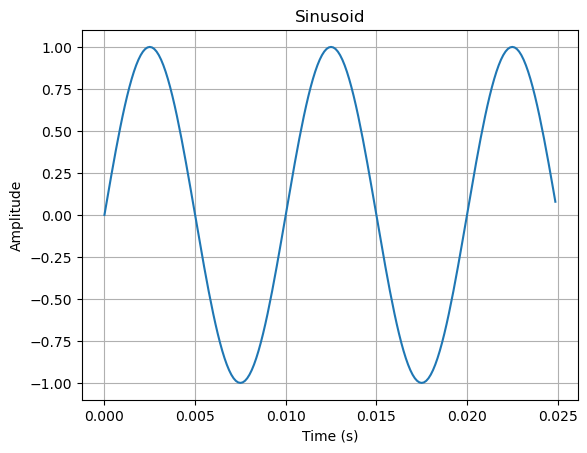

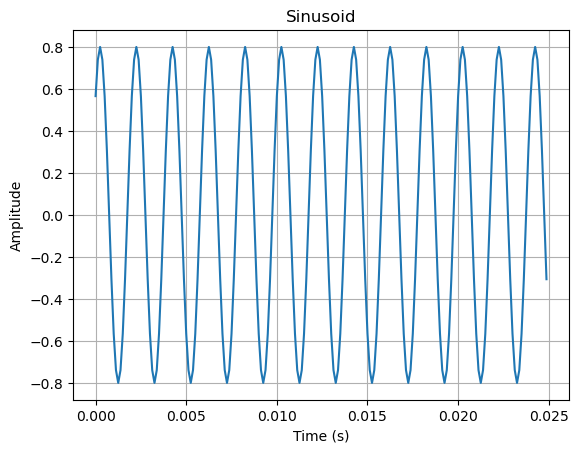

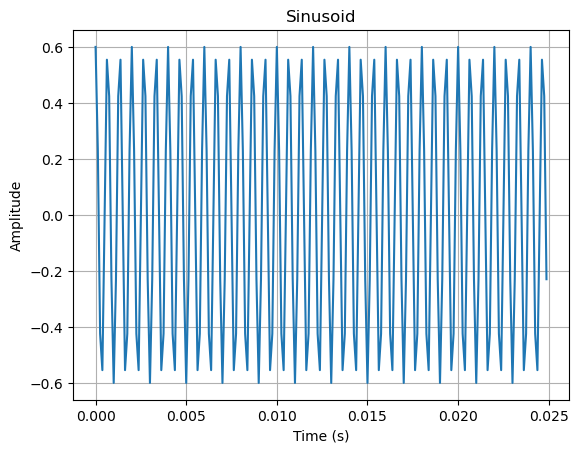

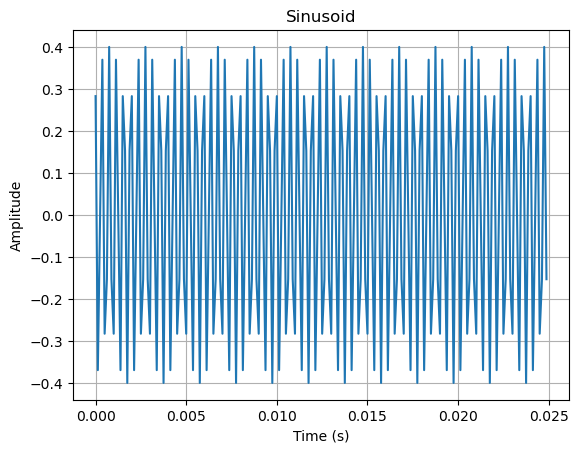

In [7]:
for x in sinusoids:
    plt.figure()
    plt.plot(t[:200], x[:200])
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.title("Sinusoid")
    plt.grid(True)
    plt.show()

#### c) Add them up to x(t). Plot and play x(t). Write the signal to a wav file.

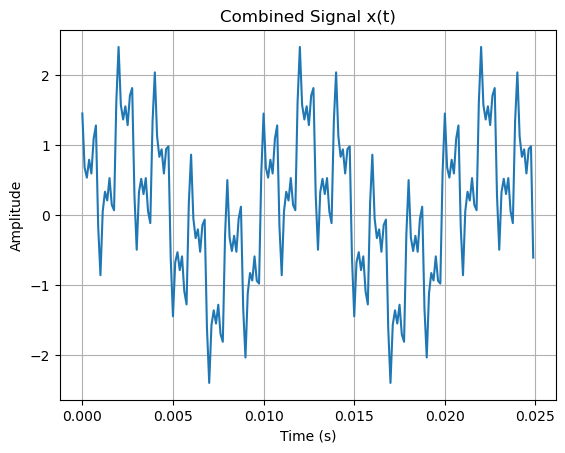

In [8]:
x_t = sum(sinusoids)

# Plot
plt.figure()
plt.plot(t[:200], x_t[:200])
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Combined Signal x(t)")
plt.grid(True)
plt.show()

# Play
display(Audio(x_t, rate=fs))

# Save to WAV
wav.write("combined_signal.wav", fs, x_t)


#### d) Apply DFT with nfft= 512

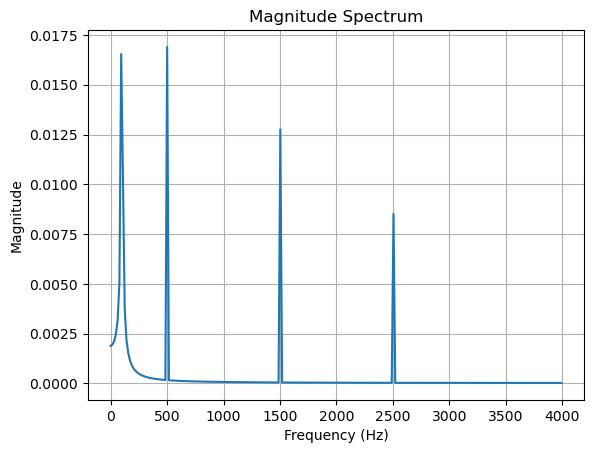

In [9]:
NFFT = 512
X_f = fft(x_t, NFFT)
frequencies = np.linspace(0, fs, NFFT)

plt.figure()
plt.plot(frequencies[:NFFT//2], 2/len(x_t) * np.abs(X_f[:NFFT//2]))
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.title("Magnitude Spectrum")
plt.grid(True)
plt.show()

#### d.1) Apply DFT with nfft= 258

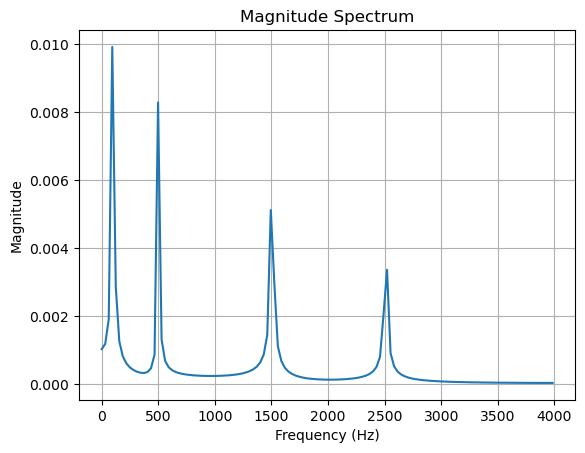

In [10]:
NFFT = 258
X_f = fft(x_t, NFFT)
frequencies = np.linspace(0, fs, NFFT)

plt.figure()
plt.plot(frequencies[:NFFT//2], 2/len(x_t) * np.abs(X_f[:NFFT//2]))
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.title("Magnitude Spectrum")
plt.grid(True)
plt.show()

#### d.2) Apply DFT with nfft= signal length

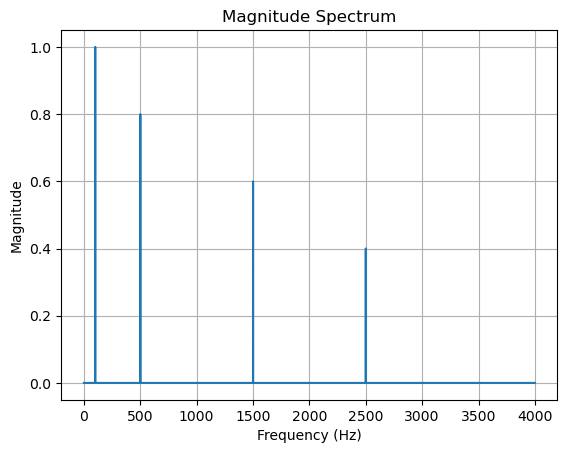

In [11]:
NFFT = len(x_t)  
X_f = fft(x_t, NFFT)
frequencies = np.linspace(0, fs, NFFT)

plt.figure()
plt.plot(frequencies[:NFFT//2], 2/len(x_t) * np.abs(X_f[:NFFT//2]))  
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.title("Magnitude Spectrum")
plt.grid(True)
plt.show()

#### e) Observe the components and relationship between nfft and frequency in Hz. Report your observation

In [ ]:
The DFT magnitude plot with an NFFT of 512 reveals sinusoidal peaks at approximately bins 6, 32, 96, and 160,
corresponding to frequencies of 100 Hz, 500 Hz, 1500 Hz, and 2500 Hz. The peak heights are indicative of the amplitudes of 
these respective sinusoids.

### 2. Read an audio and observe the spectrum. (1 point)

#### a) Read 'audio1.wav' 

In [12]:
y1, sr1 = librosa.load('audio1.wav')

#### a.1) Play

In [21]:
display(Audio(y1, rate=sr1))

#### a.2) Plot

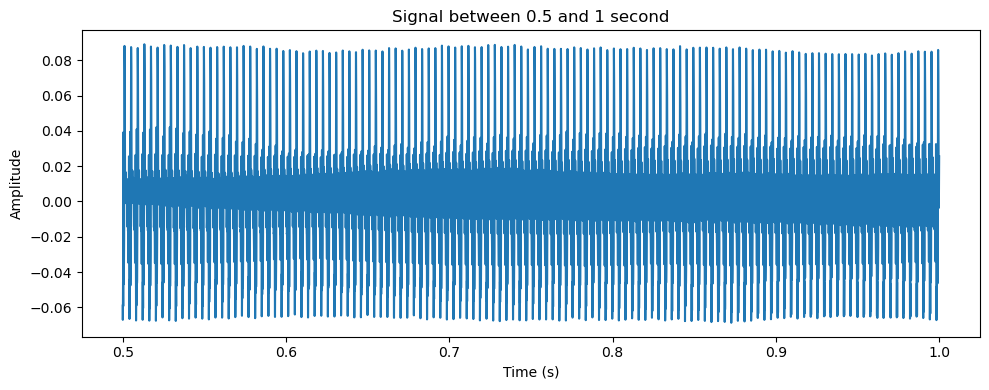

In [13]:

start_sample1 = int(0.5 * sr1)
end_sample1 = int(1 * sr1)
X1=end_sample1-start_sample1

plt.figure(figsize=(10, 4))
plt.plot(np.linspace(0.5, 1, X1), y1[start_sample1:end_sample1])
plt.title('Signal between 0.5 and 1 second')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()


#### a.3) Read 'audio2.wav' 

In [16]:
y2, sr2 = librosa.load('audio2.wav')

#### a.4) Play

In [17]:
display(Audio(y2, rate=sr2))

#### a.5) Plot

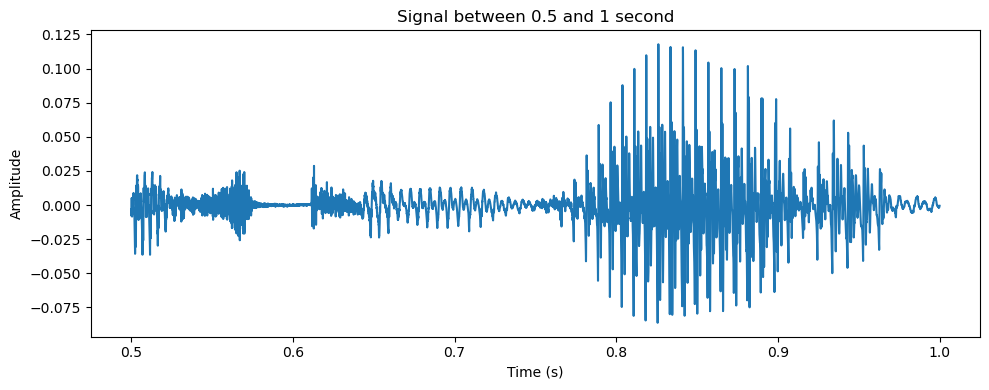

In [18]:

start_sample2 = int(0.5 * sr2)
end_sample2 = int(1 * sr2)

X2=end_sample2-start_sample2

plt.figure(figsize=(10, 4))
plt.plot(np.linspace(0.5, 1, X2), y2[start_sample2:end_sample2])
plt.title('Signal between 0.5 and 1 second')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

#### c,d) Compute DFT in a loop for 'audio1.wav' 

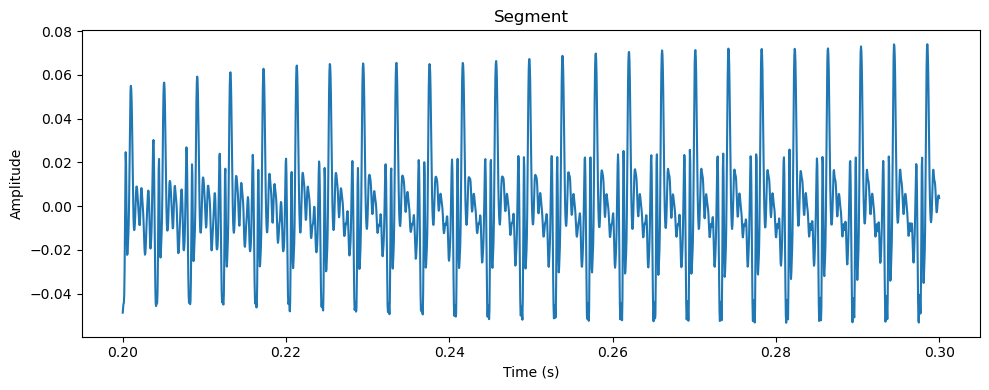

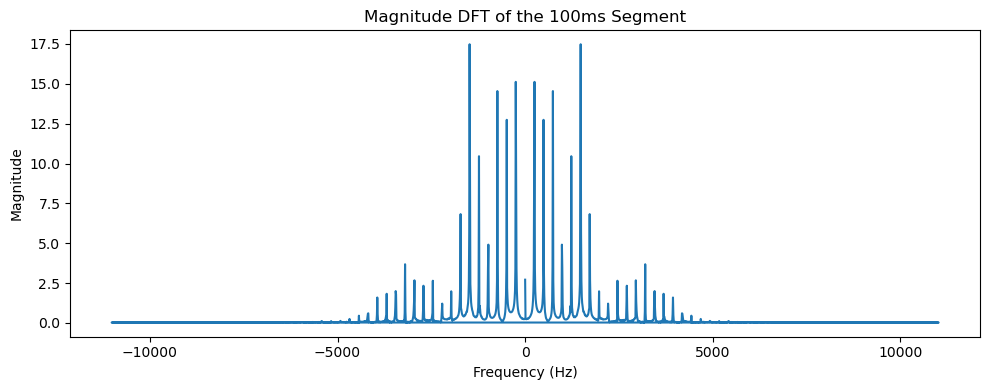

In [27]:
frame_length1 = 0.1  
start_time1 = 0.2  
end_time1 = 0.3 
samples_per_frame1 = int(frame_length1 * sr1)

start_sample1 = int(start_time1 * sr1)
end_sample1 = int(end_time1 * sr1)

segment1 = y1[start_sample1:end_sample1]

plt.figure(figsize=(10, 4))
plt.plot(np.linspace(start_time1, end_time1, len(segment1)), segment1)
plt.title('Segment')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()


magnitude1 = np.abs(np.fft.fft(segment1))
freq1 = np.fft.fftfreq(segment1.size, 1/sr1)

plt.figure(figsize=(10, 4))
plt.plot(freq1, magnitude1)
plt.title('Magnitude DFT of the 100ms Segment')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.tight_layout()
plt.show()

#### c,d) Compute DFT in a loop for 'audio2.wav' 

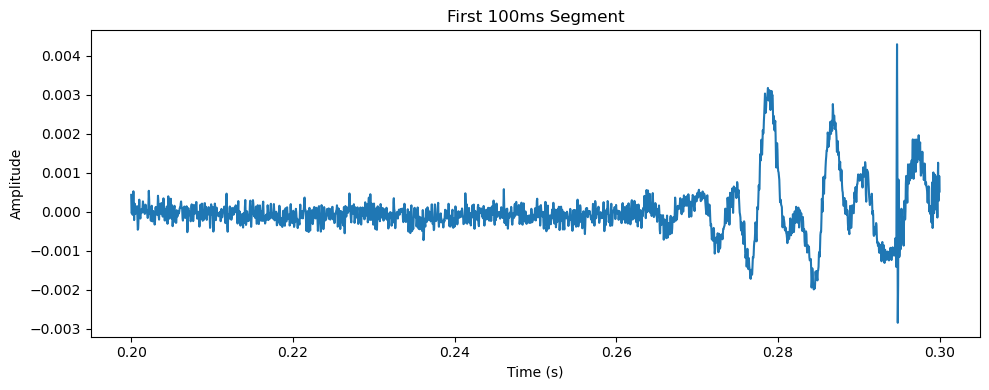

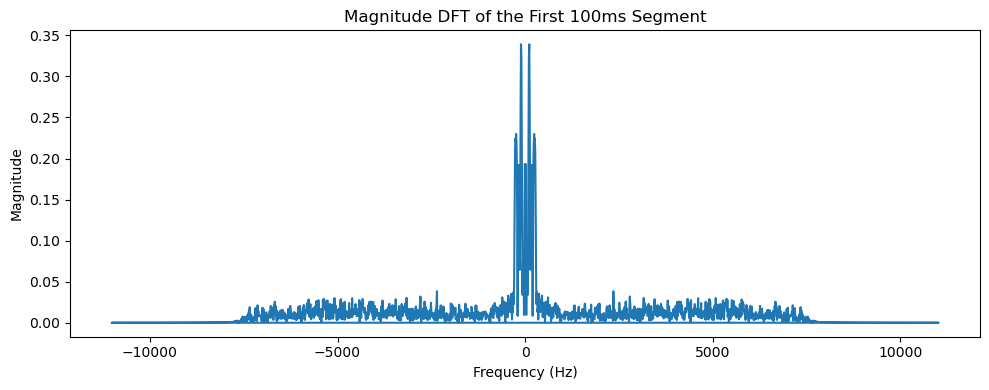

In [31]:

frame_length2 = 0.1  
start_time2 = 0.2  
end_time2 = 0.3 
samples_per_frame2 = int(frame_length2 * sr2)

start_sample2 = int(start_time2 * sr2)
end_sample2 = int(end_time2 * sr2)

segment1 = y2[start_sample2:end_sample2]

plt.figure(figsize=(10, 4))
plt.plot(np.linspace(start_time2, end_time2, len(segment2)), segment2)
plt.title('First 100ms Segment')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

magnitude2 = np.abs(np.fft.fft(segment2))
freq2 = np.fft.fftfreq(segment2.size, 1/sr2)

plt.figure(figsize=(10, 4))
plt.plot(freq2, magnitude2)
plt.title('Magnitude DFT of the First 100ms Segment')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.tight_layout()
plt.show()

#### e) How does the spectrum of these signals differ from that of sum of sinusoids? 

In [ ]:
sinusoids provides a clear and discrete representation in the frequency domain

### Bonus problem: